# Performing a simple logictic regression model to predict house prices

In [123]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
# Import the data
df = pd.read_excel('innercity.xlsx')

In [125]:
# Ignore the rows which has $ as value in any column
df = df[~df.isin(['$']).any(axis=1)]

In [126]:
df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [127]:
# Output data description
df.describe()

cid         price      room_bed     room_bath  living_measure  \
count  2.147200e+04  2.147200e+04  21406.000000  21406.000000    21455.000000   
mean   4.579189e+09  5.399363e+05      3.371158      2.114629     2080.072384   
std    2.876049e+09  3.650639e+05      0.929924      0.769116      917.443697   
min    1.000102e+06  7.500000e+04      0.000000      0.000000      290.000000   
25%    2.123047e+09  3.220000e+05      3.000000      1.750000     1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000     1910.000000   
75%    7.305301e+09  6.450000e+05      4.000000      2.500000     2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000    13540.000000   

        lot_measure         sight       quality  ceil_measure     basement  \
count  2.143000e+04  21415.000000  21471.000000  21471.000000  21471.00000   
mean   1.511353e+04      0.233948      7.657119   1788.735411    291.36533   
std    4.144184e+04      0.765424      1.175707    827.349120    442.49268   
min    5.200000e+02      0.000000      1.000000    290.000000      0.00000   
25%    5.040000e+03      0.000000      7.000000   1190.000000      0.00000   
50%    7.619000e+03      0.000000      7.000000   1560.000000      0.00000   
75%    1.067650e+04      0.000000      8.000000   2210.000000    560.00000   
max    1.651359e+06      4.000000     13.000000   9410.000000   4820.00000   

       yr_renovated       zipcode           lat  living_measure15  \
count  21472.000000  21472.000000  21472.000000      21348.000000   
mean      84.121880  98077.946721     47.560029       1987.164371   
std      401.045861     53.518944      0.138564        685.550058   
min        0.000000  98001.000000     47.155900        399.000000   
25%        0.000000  98033.000000     47.470775       1490.000000   
50%        0.000000  98065.000000     47.571800       1840.000000   
75%        0.000000  98118.000000     47.677900       2360.000000   
max     2015.000000  98199.000000     47.777600       6210.000000   

       lot_measure15     furnished  
count   21443.000000  21443.000000  
mean    12775.139999      0.196941  
std     27325.709722      0.397696  
min       651.000000      0.000000  
25%      5100.000000      0.000000  
50%      7620.000000      0.000000  
75%     10083.500000      0.000000  
max    871200.000000      1.000000

In [128]:
# check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21472 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21472 non-null  int64  
 1   dayhours          21472 non-null  object 
 2   price             21472 non-null  int64  
 3   room_bed          21406 non-null  float64
 4   room_bath         21406 non-null  float64
 5   living_measure    21455 non-null  float64
 6   lot_measure       21430 non-null  float64
 7   ceil              21430 non-null  object 
 8   coast             21471 non-null  object 
 9   sight             21415 non-null  float64
 10  condition         21415 non-null  object 
 11  quality           21471 non-null  float64
 12  ceil_measure      21471 non-null  float64
 13  basement          21471 non-null  float64
 14  yr_built          21471 non-null  object 
 15  yr_renovated      21472 non-null  int64  
 16  zipcode           21472 non-null  int64 

In [129]:
# calculate the skewness of the data
df.skew()

C:\Users\hp\AppData\Local\Temp\ipykernel_17704\2389022811.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


cid                  0.243219
price                3.873235
room_bed             1.985191
room_bath            0.496752
living_measure       1.454467
lot_measure         13.084895
ceil                 0.616166
coast               11.455112
sight                3.398491
condition            1.032563
quality              0.767556
ceil_measure         1.425115
basement             1.578246
yr_built            -0.470277
yr_renovated         4.558198
zipcode              0.406357
lat                 -0.484619
long                 0.886846
living_measure15     1.107623
lot_measure15        9.518962
furnished            1.524216
total_area          12.977128
dtype: float64

array([[<AxesSubplot: title={'center': 'cid'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'room_bed'}>,
        <AxesSubplot: title={'center': 'room_bath'}>],
       [<AxesSubplot: title={'center': 'living_measure'}>,
        <AxesSubplot: title={'center': 'lot_measure'}>,
        <AxesSubplot: title={'center': 'sight'}>,
        <AxesSubplot: title={'center': 'quality'}>],
       [<AxesSubplot: title={'center': 'ceil_measure'}>,
        <AxesSubplot: title={'center': 'basement'}>,
        <AxesSubplot: title={'center': 'yr_renovated'}>,
        <AxesSubplot: title={'center': 'zipcode'}>],
       [<AxesSubplot: title={'center': 'lat'}>,
        <AxesSubplot: title={'center': 'living_measure15'}>,
        <AxesSubplot: title={'center': 'lot_measure15'}>,
        <AxesSubplot: title={'center': 'furnished'}>]], dtype=object)

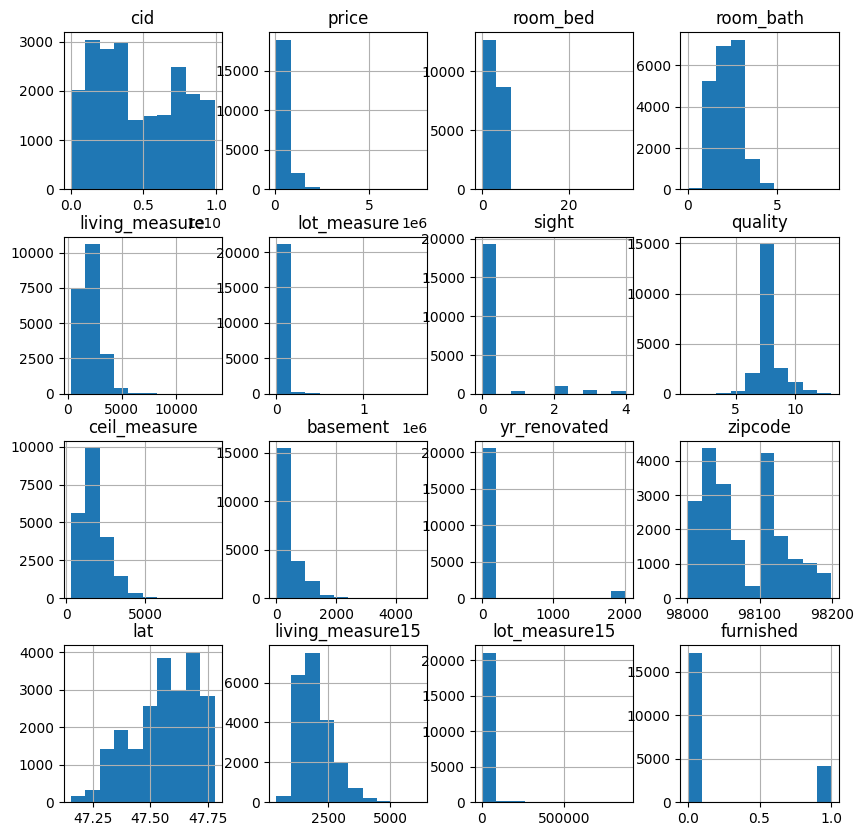

In [130]:
# black curve shows the normal distribution and the blue curve shows the data distribution present in the dataset
df.hist(figsize=(10,10))
# Here the data is not normally distributed as the histogram is not symmetric

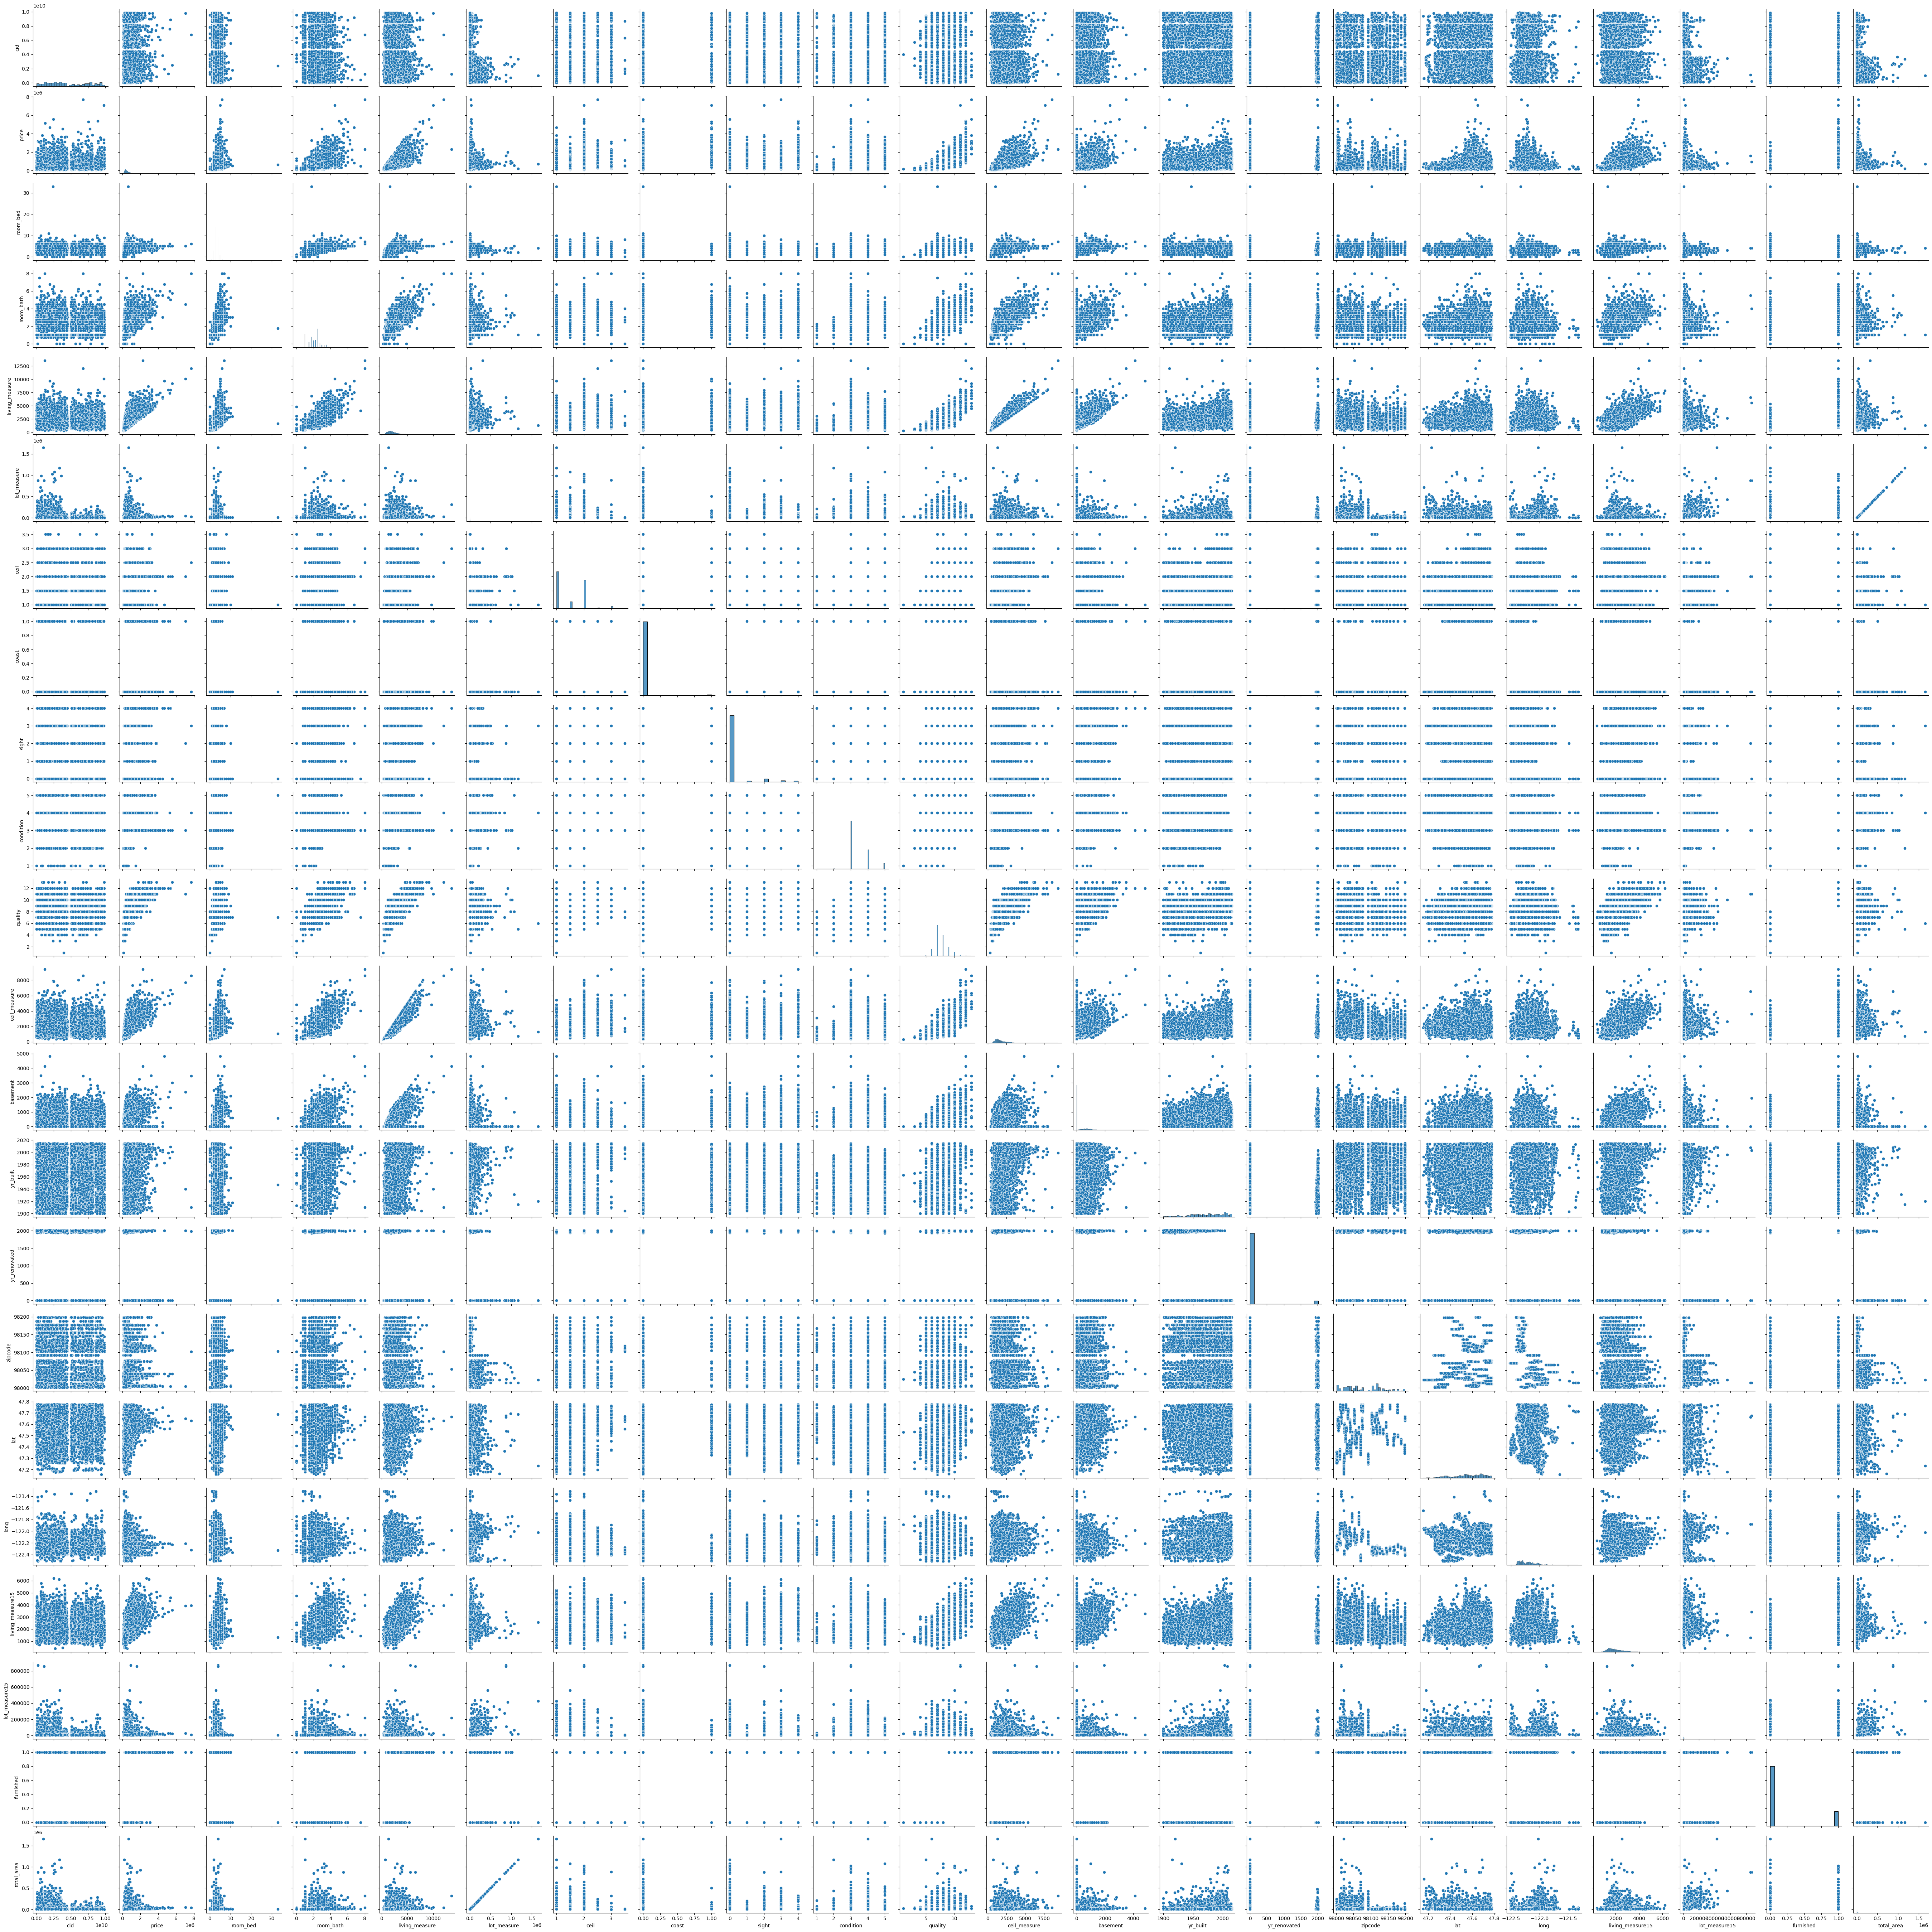

In [131]:
# Pairplot
import seaborn as sns
sns.pairplot(df)


C:\Users\hp\AppData\Local\Temp\ipykernel_17704\1082655758.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

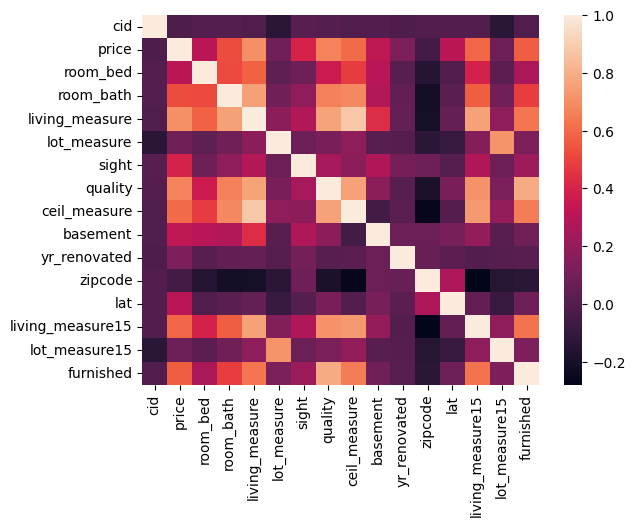

In [132]:
# heat map
sns.heatmap(df.corr())
# Heat map shows the correlation between the variables. The darker the color the more the correlation between the variables.
# Here we can see that the variables are not correlated with each other.

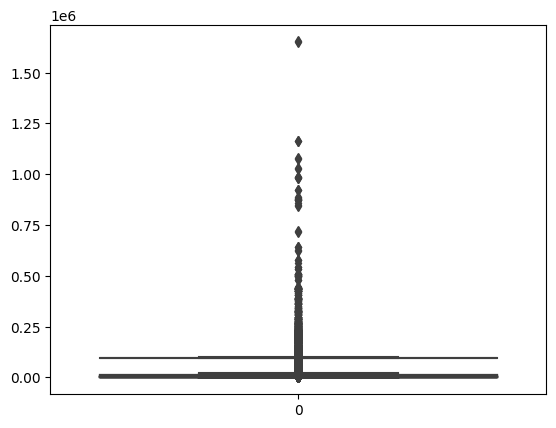

In [133]:
#outlier detection
sns.boxplot(df['room_bed'])
plt.savefig('room_bed.png')
sns.boxplot(df['room_bath'])
plt.savefig('room_bath.png')
sns.boxplot(df['living_measure'])
plt.savefig('living_measure.png')
sns.boxplot(df['lot_measure'])
plt.savefig('lot_measure.png')
sns.boxplot(df['ceil'])
plt.savefig('ceil.png')
sns.boxplot(df['coast'])
plt.savefig('coast.png')
sns.boxplot(df['sight'])
plt.savefig('sight.png')
sns.boxplot(df['condition'])
plt.savefig('condition.png')
sns.boxplot(df['quality'])
plt.savefig('quality.png')
sns.boxplot(df['ceil_measure'])
plt.savefig('ceil_measure.png')
sns.boxplot(df['basement'])
plt.savefig('basement.png')
sns.boxplot(df['yr_built'])
plt.savefig('yr_built.png')
sns.boxplot(df['yr_renovated'])
plt.savefig('yr_renovated.png')
sns.boxplot(df['zipcode'])
plt.savefig('zipcode.png')
sns.boxplot(df['lat'])
plt.savefig('lat.png')
sns.boxplot(df['long'])
plt.savefig('long.png')
sns.boxplot(df['living_measure15'])
plt.savefig('living_measure15.png')
sns.boxplot(df['lot_measure15'])
plt.savefig('lot_measure15.png')
sns.boxplot(df['total_area'])
plt.savefig('total_area.png')

In [134]:
# outlier treatment
df = df[df['room_bed'] < 8]
df = df[df['room_bath'] < 5]
df = df[df['living_measure'] < 6000]
df = df[df['lot_measure'] < 100000]
df = df[df['ceil'] < 4]
df = df[df['coast'] < 2]
df = df[df['sight'] < 5]
df = df[df['condition'] < 5]
df = df[df['quality'] < 12]
df = df[df['ceil_measure'] < 6000]
df = df[df['basement'] < 4000]
df = df[df['yr_built'] > 1900]
df = df[df['yr_renovated'] < 2015]
df = df[df['zipcode'] < 98080]
df = df[df['lat'] > 47]
df = df[df['long'] < -120]
df = df[df['living_measure15'] < 6000]
df = df[df['lot_measure15'] < 100000]
df = df[df['total_area'] < 100000]


In [135]:
df.head()

cid         dayhours    price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000   600000       4.0       1.75          3050.0   
3  7338220280  20141010T000000   257000       3.0       2.50          1740.0   
7  1624059224  20140618T000000  1160000       4.0       3.50          4680.0   
8  5469503280  20140721T000000   449950       4.0       2.50          3100.0   
9  2787460430  20141028T000000   299950       2.0       1.75          1460.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
7       9700.0    2     0    0.0  ...   1320.0      2005             0   
8      10000.0    2     0    0.0  ...      0.0      1978             0   
9      10506.0    1     0    0.0  ...      0.0      1983             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
7    98006  47.5703 -122.165            2800.0        12343.0       1.0   
8    98042  47.3741  -122.15            1850.0         9438.0       1.0   
9    98031  47.4048 -122.178            1460.0         8153.0       0.0   

   total_area  
0       12490  
3        5461  
7       14380  
8       13100  
9       11966  

[5 rows x 23 columns]

In [136]:
# normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_vars = ['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area']
df[col_vars] = scaler.fit_transform(df[col_vars])

In [137]:
df.head()

cid         dayhours    price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000   600000       4.0       1.75        0.484211   
3  7338220280  20141010T000000   257000       3.0       2.50        0.254386   
7  1624059224  20140618T000000  1160000       4.0       3.50        0.770175   
8  5469503280  20140721T000000   449950       4.0       2.50        0.492982   
9  2787460430  20141028T000000   299950       2.0       1.75        0.205263   

   lot_measure ceil coast  sight  ...  basement  yr_built  yr_renovated  \
0     0.089575    1     0    0.0  ...  0.438596      1966             0   
3     0.031075    2     0    0.0  ...  0.000000      2009             0   
7     0.092234    2     0    0.0  ...  0.463158      2005             0   
8     0.095303    2     0    0.0  ...  0.000000      1978             0   
9     0.100479    1     0    0.0  ...  0.000000      1983             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183          0.259332       0.080269       0.0   
3    98002  47.3363 -122.213          0.261297       0.030903       0.0   
7    98006  47.5703 -122.165          0.412574       0.117635       1.0   
8    98042  47.3741  -122.15          0.225933       0.088162       1.0   
9    98031  47.4048 -122.178          0.149312       0.075126       0.0   

   total_area  
0    0.109043  
3    0.037122  
7    0.128382  
8    0.115285  
9    0.103681  

[5 rows x 23 columns]

In [138]:
# drop the cid column
df = df.drop(['cid'], axis=1)
df = df.drop(['dayhours'], axis=1)

In [139]:
df.head()

price  room_bed  room_bath  living_measure  lot_measure ceil coast  \
0   600000       4.0       1.75        0.484211     0.089575    1     0   
3   257000       3.0       2.50        0.254386     0.031075    2     0   
7  1160000       4.0       3.50        0.770175     0.092234    2     0   
8   449950       4.0       2.50        0.492982     0.095303    2     0   
9   299950       2.0       1.75        0.205263     0.100479    1     0   

   sight condition  quality  ...  basement  yr_built yr_renovated  zipcode  \
0    0.0         3      8.0  ...  0.438596      1966            0    98034   
3    0.0         3      8.0  ...  0.000000      2009            0    98002   
7    0.0         3     10.0  ...  0.463158      2005            0    98006   
8    0.0         3      9.0  ...  0.000000      1978            0    98042   
9    0.0         3      7.0  ...  0.000000      1983            0    98031   

       lat     long living_measure15  lot_measure15  furnished  total_area  
0  47.7228 -122.183         0.259332       0.080269        0.0    0.109043  
3  47.3363 -122.213         0.261297       0.030903        0.0    0.037122  
7  47.5703 -122.165         0.412574       0.117635        1.0    0.128382  
8  47.3741  -122.15         0.225933       0.088162        1.0    0.115285  
9  47.4048 -122.178         0.149312       0.075126        0.0    0.103681  

[5 rows x 21 columns]

In [140]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [141]:
# Load Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

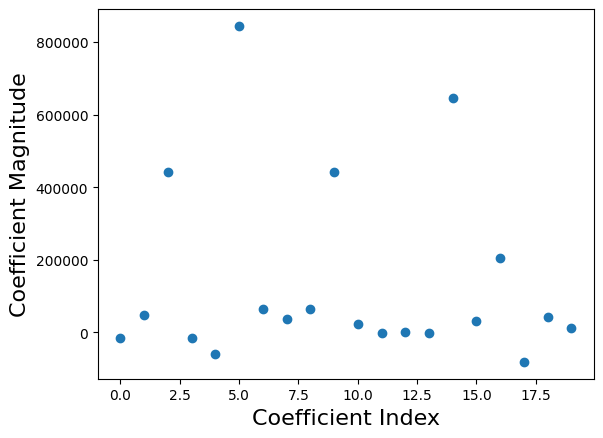

In [142]:
# fit the model
lm.fit(X_train, y_train)

# plot loss function
plt.plot(lm.coef_, marker='o', linestyle='')
plt.xlabel('Coefficient Index', fontsize=16)
plt.ylabel('Coefficient Magnitude', fontsize=16)
plt.savefig('loss.png')


In [143]:
# print the intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

158255660.73795635
[-1.63143383e+04  4.91503452e+04  4.40831946e+05 -1.49325616e+04
 -5.84065829e+04  8.44492848e+05  6.38043642e+04  3.59790697e+04
  6.33029998e+04  4.41194965e+05  2.18755290e+04 -1.51432984e+03
  5.50452205e+01 -1.85987946e+03  6.45142113e+05  3.27492186e+04
  2.05653577e+05 -8.13334695e+04  4.23885076e+04  1.07733905e+04]


Coefficient
room_bed          -16314.338336
room_bath          49150.345246
living_measure    440831.946266
lot_measure       -14932.561621
ceil              -58406.582861
coast             844492.848420
sight              63804.364171
condition          35979.069691
quality            63302.999791
ceil_measure      441194.965059
basement           21875.529046
yr_built           -1514.329842
yr_renovated          55.045221
zipcode            -1859.879457
lat               645142.113359
long               32749.218646
living_measure15  205653.576911
lot_measure15     -81333.469451
furnished          42388.507562
total_area         10773.390542

In [144]:
# Predict the model
y_pred = lm.predict(X_test)

In [153]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean Squared Error: 31378824699.111168
R2 Score: 0.7020326657349485
Coefficient of determination: 0.70


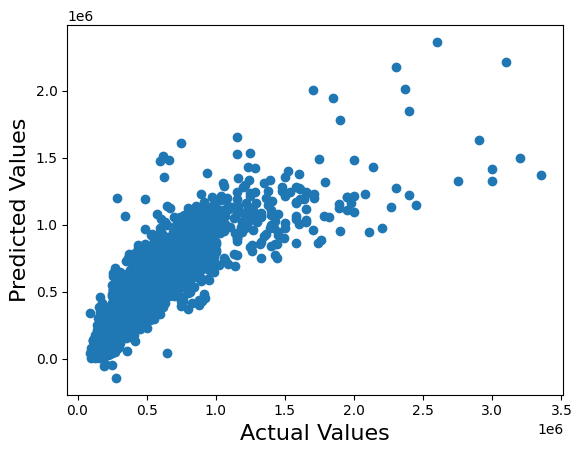

In [146]:
# Plot the predicted values and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.savefig('actual_vs_predicted.png')


In [147]:
# model accuracy
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 111161.74961092323
MSE: 31378824699.111168
RMSE: 177140.6918218148


In [152]:
# The error is too high, so we need to improve the model
# We can improve the model by using regularization techniques
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
# accuracy
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

MAE: 111160.67567298745
MSE: 31378310703.144802
RMSE: 177139.24100307305


In [151]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
# accuracy of the model
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))


MAE: 111161.76688371392
MSE: 31378817888.711555
RMSE: 177140.67259867667


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+14, tolerance: 8.447e+10
  model = cd_fast.enet_coordinate_descent(
